In [124]:
import geopandas as gpd
import pandas as pd
import numpy as np
import fiona.crs as crs
import os
from shapely.geometry import Polygon, Point
import matplotlib.pyplot as plt
import geoplot

In [165]:
path_base= r'/Users/raphaellaude/Documents/Projects/misc learning/qgis learning'

In [126]:
grid= gpd.read_file(os.path.join(path_base, 'grid_190204.shp'))

In [129]:
grid= grid.to_crs(crs.from_epsg(2263))

In [130]:
pluto= gpd.read_file(os.path.join(path_base, 'nyc_mappluto_18v2_shp_nowater//MapPLUTO.shp'))

In [131]:
pluto= pluto.to_crs(crs.from_epsg(2263))

In [132]:
sel_cols= ['Borough','LandUse','UnitsRes','id', 'geometry']

In [134]:
df= gpd.overlay(pluto, grid, how='union')

In [11]:
# if not spatial joining, importing preprocessed unioned shapefile
#df= gpd.read_file(os.path.join(path_base, 'grided_pluto_short.shp'))

In [135]:
df['polycutarea']= df.geometry.apply(lambda x: x.area)

In [137]:
df[(df.id==10124)].groupby('LandUse').sum().polycutarea

LandUse
09    1.003281e+06
Name: polycutarea, dtype: float64

In [138]:
uses= df[['id', 'LandUse', 'polycutarea']].groupby(['id', 'LandUse']).sum().unstack()

In [142]:
uses.shape

(9401, 11)

In [143]:
use_cols= ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11']

In [144]:
uses.columns= ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11']

In [145]:
grid.index= grid.id

In [146]:
grided_pluto= grid.join(uses, how='inner').drop(['left', 'right', 'top', 'bottom'], axis=1)

In [148]:
forty_acres= grided_pluto.iloc[4739].geometry.area

In [149]:
grided_pluto['t_landused']= grided_pluto[use_cols].sum(axis=1)

In [152]:
grided_pluto['p_landused']= grided_pluto.t_landused/forty_acres

In [153]:
grided_pluto.p_landused.quantile(0.05)

0.11231651088516041

In [154]:
plu= grided_pluto.p_landused
plu= (plu-plu.min())/(plu.max()-plu.min())

In [155]:
grided_pluto['p_landused']= plu

In [157]:
grided_pluto['primary_use']= grided_pluto[use_cols].idxmax(axis=1)

In [158]:
grided_pluto.head()

,id,geometry,01,02,03,04,05,06,07,08,09,10,11,primary_use,t_landused,p_landused
id,,,,,,,,,,,,,,,,
149.0,149,"POLYGON ((912750.0623395484 125435.9292472598,...",155539.941677,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18530.65095,12447.387854,01,186517.980481,0.185361
150.0,150,"POLYGON ((912747.123653074 124434.8061798724, ...",333705.346951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12091.160038,NaN,62718.860142,01,408515.367131,0.405981
151.0,151,"POLYGON ((912744.1848467529 123433.6422841674,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,74160.621559,387205.314655,NaN,NaN,09,461365.936214,0.458503
152.0,152,"POLYGON ((912741.2459205799 122432.437558528, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,3517.552924,84737.904923,NaN,NaN,09,88255.457847,0.087708
301.0,301,"POLYGON ((913760.8594080287 127435.1238032234,...",70239.979770,NaN,NaN,NaN,11071.285272,NaN,27335.698545,NaN,5424.993390,NaN,102320.288068,11,216392.245045,0.215050


In [159]:
grided_pluto.drop('id', axis=1, inplace=True)

In [160]:
grided_pluto.to_file(os.path.join(path_base, 'primary_uses_grid_190204.shp'))

/Users/raphaellaude/anaconda3/lib/python3.7/site-packages/geopandas/io/file.py:108: FionaDeprecationWarning: Use fiona.Env() instead.
  with fiona.drivers():


In [162]:
grided_pluto.shape[0]

9401

In [170]:
grided_pluto[grided_pluto.p_landused>0.2].to_file(os.path.join(path_base, 'primary_uses_grid_190204_over2p.shp'))

In [176]:
grided_pluto.geometry.area.head()

id
149.0    1.006161e+06
150.0    1.006243e+06
151.0    1.006325e+06
152.0    1.006408e+06
301.0    1.005996e+06
dtype: float64

In [182]:
1.005996e+06/43560

23.094490358126723

In [178]:
np.sqrt(1.006161e+06)

1003.0757698200072

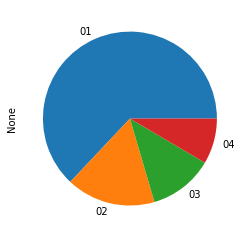

In [189]:
grided_pluto.sum()['01 02 03 04'.split()].plot(kind='pie');
plt.savefig(os.path.join(path_base, 'housing_pie.pdf'))

In [192]:
housing=pd.DataFrame(grided_pluto.sum()['01 02 03 04'.split()])

In [207]:
housing['pct_type']= housing.iloc[:,0]/2.92683601e+09

In [208]:
housing

,0,pct_type
01,1.843220e+09,0.629765
02,4.852431e+08,0.165791
03,3.505351e+08,0.119766
04,2.478377e+08,0.084678


In [206]:
housing.iloc[:,0]/2.92683601e+09

01    0.629765
02    0.165791
03    0.119766
04    0.084678
Name: 0, dtype: float64

In [205]:
housing.sum().values

array([2.92683601e+09, 0.00000000e+00])